# Preprocessing

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn import linear_model 

In [2]:
fp = '/Users/jacksonpeoples/Desktop/Springboard/CapstoneTwo/Data/hourly_new.csv'
data = pd.read_csv(fp, index_col='LocalTime')

In [3]:
data.head()

,temp,wind_speed,rain_1h,snow_1h,clouds_all,Count,OneWeek,TwoWeek,ThreeWeek,TimeDateAvg,...,Christmas Holiday,Columbus Day,July 4th,Labor Day,Martin Luther King Jr. Day,Memorial Day,New Years Day,Presidents Day,Thanksgiving,Veterans Day
LocalTime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,42.49,6.93,0.0,0.0,90,1.0,1.0,1.0,1.0,2.090909,...,0,0,0,0,0,0,1,0,0,0
2010-01-01 01:00:00,42.53,5.82,0.0,0.0,90,4.0,4.0,4.0,4.0,2.818182,...,0,0,0,0,0,0,1,0,0,0
2010-01-01 02:00:00,40.69,9.17,0.0,0.0,1,6.0,6.0,6.0,6.0,4.363636,...,0,0,0,0,0,0,1,0,0,0
2010-01-01 03:00:00,38.52,5.82,0.0,0.0,1,1.0,1.0,1.0,1.0,3.636364,...,0,0,0,0,0,0,1,0,0,0
2010-01-01 04:00:00,36.30,8.93,0.0,0.0,1,3.0,3.0,3.0,3.0,1.909091,...,0,0,0,0,0,0,1,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93503 entries, 2010-01-01 00:00:00 to 2020-08-31 23:00:00
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temp                        93503 non-null  float64
 1   wind_speed                  93503 non-null  float64
 2   rain_1h                     93503 non-null  float64
 3   snow_1h                     93503 non-null  float64
 4   clouds_all                  93503 non-null  int64  
 5   Count                       93503 non-null  float64
 6   OneWeek                     93503 non-null  float64
 7   TwoWeek                     93503 non-null  float64
 8   ThreeWeek                   93503 non-null  float64
 9   TimeDateAvg                 93503 non-null  float64
 10  RollingAvg                  93503 non-null  float64
 11  is_raining                  93503 non-null  int64  
 12  is_pandemic                 93503 non-null  int64  
 13  is_s

In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93503 entries, 2010-01-01 00:00:00 to 2020-08-31 23:00:00
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temp                        93503 non-null  float64
 1   wind_speed                  93503 non-null  float64
 2   rain_1h                     93503 non-null  float64
 3   snow_1h                     93503 non-null  float64
 4   clouds_all                  93503 non-null  int64  
 5   Count                       93503 non-null  float64
 6   OneWeek                     93503 non-null  float64
 7   TwoWeek                     93503 non-null  float64
 8   ThreeWeek                   93503 non-null  float64
 9   TimeDateAvg                 93503 non-null  float64
 10  RollingAvg                  93503 non-null  float64
 11  is_raining                  93503 non-null  int64  
 12  is_pandemic                 93503 non-null  int64  
 

In [7]:
data_transformed = data
numeric = ['temp', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all','OneWeek', 'TwoWeek', 'ThreeWeek',
          'TimeDateAvg', 'RollingAvg']
standard = StandardScaler()
standard.fit(data[numeric])
data_transformed[numeric] = standard.transform(data[numeric])

In [8]:
data_transformed.describe()

,temp,wind_speed,rain_1h,snow_1h,clouds_all,Count,OneWeek,TwoWeek,ThreeWeek,TimeDateAvg,...,Christmas Holiday,Columbus Day,July 4th,Labor Day,Martin Luther King Jr. Day,Memorial Day,New Years Day,Presidents Day,Thanksgiving,Veterans Day
count,9.350300e+04,9.350300e+04,9.350300e+04,9.350300e+04,9.350300e+04,93503.000000,9.350300e+04,9.350300e+04,9.350300e+04,9.350300e+04,...,93503.000000,93503.000000,93503.000000,93503.000000,93503.000000,93503.000000,93503.000000,93503.000000,93503.000000,93503.000000
mean,4.237283e-16,-1.673778e-14,-3.577213e-14,5.032017e-15,-6.643104e-15,1.730682,1.999199e-14,-7.747299e-14,3.968539e-14,-2.303158e-16,...,0.000770,0.002567,0.002823,0.002567,0.002823,0.002823,0.002823,0.002823,0.002567,0.002567
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.678898,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,0.027739,0.050598,0.053061,0.050598,0.053061,0.053061,0.053061,0.053061,0.050598,0.050598
min,-3.346173e+00,-2.238817e+00,-1.001914e-01,-1.151625e-02,-9.265773e-01,0.000000,-1.029999e+00,-1.029682e+00,-1.029479e+00,-1.962450e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.006488e-01,-6.173478e-01,-1.001914e-01,-1.151625e-02,-9.014895e-01,0.000000,-1.029999e+00,-1.029682e+00,-1.029479e+00,-7.254499e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.593185e-01,-1.741461e-01,-1.001914e-01,-1.151625e-02,-4.248209e-01,1.000000,-4.344539e-01,-4.340584e-01,-4.337863e-01,-1.069497e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.036727e-01,6.546049e-01,-1.001914e-01,-1.151625e-02,1.331327e+00,3.000000,7.566367e-01,7.571880e-01,7.575992e-01,6.455589e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.452981e+00,7.644940e+00,3.920364e+01,1.039840e+02,1.582205e+00,20.000000,1.088091e+01,1.088278e+01,1.088438e+01,4.500877e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For the time being, I will leave out 2020 from the train/test data because of the pandemic. Will come back to it later.

In [9]:
TrainYears = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
TestYears =[2018, 2019]

X = data_transformed.drop(columns='Count')
y = data_transformed['Count']

X_train = X[X.index.year.isin(TrainYears)]
y_train = y[y.index.year.isin(TrainYears)]
X_test = X[X.index.year.isin(TestYears)]
y_test = y[y.index.year.isin(TestYears)]

# Linear Regression (OLS)

In [12]:
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred = ols.predict(X_test)

In [17]:
y_pred_df = pd.DataFrame(y_pred, index=y_test.index)

In [20]:
y_pred_df.head()

,0
LocalTime,
2018-01-01 00:00:00,1.339799
2018-01-01 01:00:00,2.059131
2018-01-01 02:00:00,3.221633
2018-01-01 03:00:00,2.726732
2018-01-01 04:00:00,1.091922


In [22]:
ols.score(X_test, y_test)

0.2702656010905934

# Ridge Regression

In [91]:
param_grid = {'alpha':[.01, .1, 1, 10, 100, 1000]}
tscv = TimeSeriesSplit()
ridge = linear_model.Ridge()
ridge_cv = GridSearchCV(ridge, cv=tscv, param_grid=param_grid)

In [92]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
ridge_cv.best_score_, ridge_cv.best_params_

(0.301213032985976, {'alpha': 100})

In [98]:
X_test.drop(columns=['pred','actual'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
ridge1 = linear_model.Ridge(alpha=100)
ridge1.fit(X_train, y_train)
ridge_pred = ridge1.predict(X_test)

ridge_df = X_test.copy()
ridge_df['pred'] = ridge_pred
ridge_df['actual'] = y_test

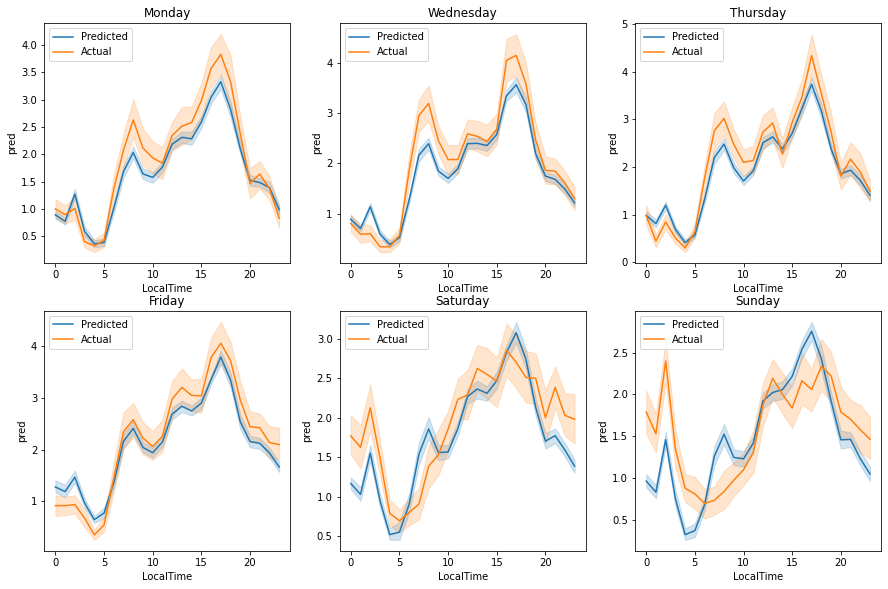

In [101]:
weekdays = ['Monday','Wednesday','Thursday','Friday','Saturday','Sunday']
counter=1
plt.figure(figsize=(15, 15))
          
for day in weekdays:
    df = ridge_df[ridge_df[day]==1]
    plt.subplot(3,3,counter)
    sns.lineplot(data=df, x=df.index.hour, y='pred', label='Predicted')
    sns.lineplot(data=df, x=df.index.hour, y='actual', label='Actual')
    plt.title(day)
    counter +=1
plt.show()

# Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf_param_grid = {'n_estimators':[10,50,100], 'max_depth':[3]}
rfr = RandomForestRegressor()
rfr_cv = GridSearchCV(rfr, param_grid= rf_param_grid, cv=5)
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [39]:
rfr_cv.best_params_, rfr_cv.best_score_

({'max_depth': 3, 'n_estimators': 100}, 0.2663960612271884)

In [40]:
rfr2= RandomForestRegressor(n_estimators=200, max_depth=5)

In [41]:
rfr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
rfr2.score(X_test, y_test)

0.33844514029816203

In [44]:
rf_param_grid2 = {'n_estimators':[100, 200], 'max_depth':[5,10,20]}
rfr_cv2 = GridSearchCV(rfr, param_grid= rf_param_grid2, cv=5)
rfr_cv2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [45]:
rfr_cv2.best_params_, rfr_cv2.best_score_

({'max_depth': 10, 'n_estimators': 200}, 0.31836666636574906)

In [46]:
rfr_model = RandomForestRegressor(max_depth=10, n_estimators=200)
rfr_model.fit(X_train, y_train)
rfr_model.score(X_test, y_test)

0.3459666443168575

In [54]:
rf_pred_y = rfr_model.predict(X_test)

In [58]:
rf_df = X_test.copy()
rf_df['pred'] = rf_pred_y
rf_df['actual'] = y_test

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
rf_df.head()

,temp,wind_speed,rain_1h,snow_1h,clouds_all,OneWeek,TwoWeek,ThreeWeek,TimeDateAvg,RollingAvg,...,July 4th,Labor Day,Martin Luther King Jr. Day,Memorial Day,New Years Day,Presidents Day,Thanksgiving,Veterans Day,pred,actual
LocalTime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,-2.678073,-0.174146,-0.100191,-0.011516,1.331327,-1.029999,-1.029682,-0.433786,0.408467,-1.142377,...,0,0,0,0,1,0,0,0,1.618233,1.0
2018-01-01 01:00:00,-2.697448,0.654605,-0.100191,-0.011516,1.331327,-1.029999,0.161565,-0.433786,1.233134,-0.596628,...,0,0,0,0,1,0,0,0,2.212558,1.0
2018-01-01 02:00:00,-2.697448,1.897731,-0.100191,-0.011516,1.331327,-1.029999,0.161565,-1.029479,2.985551,-0.869503,...,0,0,0,0,1,0,0,0,3.592666,4.0
2018-01-01 03:00:00,-2.701822,0.654605,-0.100191,-0.011516,1.331327,-1.029999,0.161565,-0.433786,2.160884,-0.596628,...,0,0,0,0,1,0,0,0,3.140830,2.0
2018-01-01 04:00:00,-2.700572,1.076187,-0.100191,-0.011516,1.331327,-1.029999,-1.029682,-1.029479,0.202300,-1.415251,...,0,0,0,0,1,0,0,0,1.627765,0.0


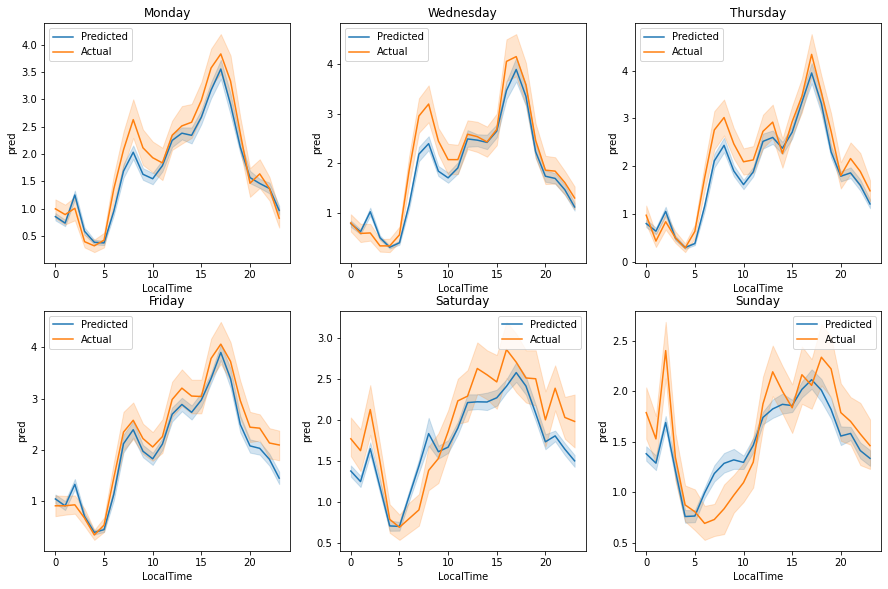

In [90]:
weekdays = ['Monday','Wednesday','Thursday','Friday','Saturday','Sunday']
counter=1
plt.figure(figsize=(15, 15))
          
for day in weekdays:
    df = rf_df[rf_df[day]==1]
    plt.subplot(3,3,counter)
    sns.lineplot(data=df, x=df.index.hour, y='pred', label='Predicted')
    sns.lineplot(data=df, x=df.index.hour, y='actual', label='Actual')
    plt.title(day)
    counter +=1
plt.show()

# Lasso Regression

In [52]:
lasso = linear_model.Lasso()
lasso_param = {'alpha':[.001, .01, .1, .25,.5,.75,1]}
lasso_cv = GridSearchCV(lasso, param_grid = lasso_param, cv=5)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
lasso_cv.best_params_, lasso_cv.best_score_

({'alpha': 0.001}, 0.29940570512047515)